### Import modules

In [169]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

### Initialize centroids

In [170]:
def initialize_centroids(img_1d, k_clusters, init_centroids):
    if init_centroids == 'random':
        return np.random.choice(256, size=(k_clusters, img_1d.shape[1]), replace=False)
    elif init_centroids == 'in_pixels':
        return img_1d[np.random.choice(img_1d.shape[0], k_clusters, replace=False)]

### Calculate distance between pixels in two matrices

In [171]:
def calc_dist_mat(img_1d, centroids):
    # Lấy ý tưởng dựa trên broadcasting, bằng cách reshape hai ma trận img_1d và centroids, để có thể trừ cùng lúc tất cả phần tử thuộc img_1d cho tất cả phần tử thuộc centroids 
    a = img_1d.reshape(img_1d.shape[0], 1, img_1d.shape[1])
    b = centroids.reshape(1, centroids.shape[0], img_1d.shape[1])
    return np.sqrt(np.square(a - b).sum(axis=2))

### Update new centroids

In [172]:
def update_centroids(img_1d, centroids, labels):
    for k in range(centroids.shape[0]):
        # Lấy ra các điểm màu thuộc về cluster thứ k
        cluster_points = img_1d[labels == k]
        # Update lại cluster thứ k nếu cần thiết
        if len(cluster_points) > 0:
            centroids[k] = np.mean(cluster_points, axis=0)

### K-means algorithm

In [173]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    centroids = initialize_centroids(img_1d, k_clusters, init_centroids).astype(float)
    labels = np.zeros(img_1d.shape[0])
    while max_iter > 0:
        # Lưu trữ centroids cũ trước khi update
        pre_centroids = np.copy(centroids)
        # Tính labels 
        labels = calc_dist_mat(img_1d, centroids).argmin(axis=1)
        update_centroids(img_1d, centroids, labels)
        # Nếu mức độ thay đổi của centroids mới so centroids cũ không 
        # quá hằng số Epsilon cho trước thì dừng 
        if(np.allclose(pre_centroids, centroids, atol=1)):
            break
        max_iter -= 1   
    return centroids, labels

### Recolorize image

In [174]:
def recolorize_image(img_1d, k_clusters, centroids, labels):
  # Tạo ma trận 0 có kích thước bằng img_1d
  recolorized_img = np.zeros((img_1d.shape[0], img_1d.shape[1]))
  for k in range(k_clusters):
    # Cộng các phần tử của ma trận 0 (thỏa điều kiện có labels tại đó = k) cho centroid k, tương đương với phép gán centroid k cho các phần tử có label tương ứng
    recolorized_img[labels == k] += centroids[k]
  return recolorized_img

### Main function

Number of colors in orginal image: 1556 colors
Number of colors in compressed image: 7 colors
Max iteration: 20
=========== random centroids ==========
Centroids: 
 [[202.         247.          67.          48.        ]
 [ 13.         136.          86.           8.        ]
 [ 50.59104478  50.62510975  74.49341528 255.        ]
 [165.57913326 220.48828649 254.91904861 255.        ]
 [246.78576769 204.58932218 155.14593219 255.        ]
 [ 22.          61.         139.           7.        ]
 [254.40633908 254.64981773 254.77284032 255.        ]]


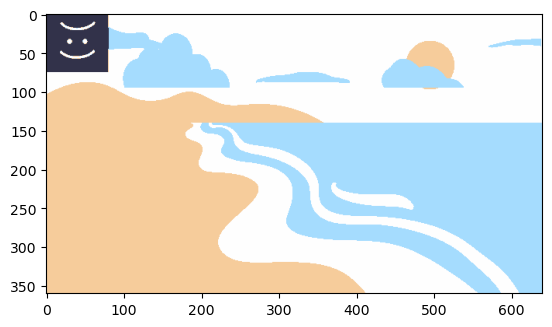

In [175]:
if __name__ == '__main__':

  # Nhập tên ảnh đầu vào, định dạng đầu ra và k clusters
  image_name = input('Name of image: ')
  image_ext = input('Image format you want to save: ')
  k_clusters = int(input('K cluster (3, 5, 7): '))

  # Kiểu chọn centroids: in_pixels hoặc random
  choosing_way = 'random'
  # Max iteration
  max_iter = 20

  image = Image.open(image_name)
  # Chuyển ảnh thành np.array với kiểu dữ liệu float
  image_arr = np.array(image).astype('float')
  # Reshape thành ma trận 1 chiều các điểm ảnh (Mỗi điểm ảnh là 1 vector)
  image_1d = image_arr.reshape((image_arr.shape[0] * image_arr.shape[1], image_arr.shape[2]))
  print(f'Number of colors in orginal image: {np.unique(image_1d, axis=0).shape[0]} colors')
  print(f"Number of colors in compressed image: {k_clusters} colors")
  print(f"Max iteration: {max_iter}")
  
  # Show the centroids matrix and compressed image
  print(f"=========== {choosing_way} centroids ==========")
  centroids, labels = kmeans(image_1d, k_clusters, max_iter, init_centroids=choosing_way)
  print("Centroids: \n", centroids)
  compressed_img = recolorize_image(image_1d, centroids.shape[0], centroids, labels).reshape(image_arr.shape)
  plt.imshow(compressed_img.astype('uint8'))
  plt.show()

  # Save the compressed image
  image_name = image_name.split('.')
  Image.fromarray(compressed_img.astype('uint8')).save(f'compressed_{image_name[0]}.{image_ext}')